# MonsoonBench: Evaluating Monsoon Onset Forecasts
A quick walkthrough of the package

## Imports

#### Metrics

In [1]:
from monsoonbench.metrics.climatology import ClimatologyOnsetMetrics
from monsoonbench.metrics.deterministic import DeterministicOnsetMetrics
from monsoonbench.metrics.probabilistic import ProbabilisticOnsetMetrics

#### Visualization

In [2]:
import matplotlib.pyplot as plt

from monsoonbench.visualization import download_spatial_metrics_data
from monsoonbench.visualization.spatial import plot_spatial_metrics

## Configuration
Must define paths to necessary data for model evaluation

In [3]:
config = {
    "years": [2019, 2020, 2021], # The years over which the model forecast should be evaluated
    "imd_folder": "../../../data/imd_rainfall_data/2p0", # Ground truth rainfall data
    "thres_file": "../../../data/imd_onset_threshold/mwset2x2.nc4", # Threshold for the onset of the monsoon
    "shpfile_path": "../../../data/ind_map_shpfile/india_shapefile.shp", # Shapefile of India
}

## Climatology Metrics

In [4]:
metrics = ClimatologyOnsetMetrics()

In [5]:
# Compute metrics
climatology_df, climatological_onset = metrics.compute_climatology_baseline_multiple_years(
    years=config["years"],
    imd_folder=config["imd_folder"],
    thres_file=config["thres_file"],
    # model_forecast_dir=config["model_forecast_dir"], # No forecast for climatology baseline
    tolerance_days=3,
    verification_window=1,
    forecast_days=15,
    max_forecast_day=15,
    mok=True,
    onset_window=5,
    mok_month=6,
    mok_day=2,
)

onset_da_dict_clim = dict.fromkeys(config["years"], climatological_onset)

Computing climatological onset reference...
Computing climatological onset from 124 years: 1901-2024
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1901.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1901-06-02) as start date for onset detection
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1902.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1902-06-02) as start date for onset detection
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1903.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1903-06-02) as start date for onset detection
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_1904.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (1904-06-02) as start date for onset detection

In [6]:
plot_climatology_metrics = metrics.create_spatial_far_mr_mae(climatology_df, onset_da_dict_clim)

Creating spatial FAR, Miss Rate, yearly MAE, and mean MAE maps...
Grid dimensions: 16 lats x 17 lons
Years: [2019, 2020, 2021]


Detected resolution: 2.0 degrees
Using 2.0-degree CMZ polygon coordinates
Figure saved to: outputs/climatology_monsoon_onset_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 6.85 ± 0.88 days
CMZ False Alarm Rate: 20.0 %
CMZ Miss Rate: 50.2 %


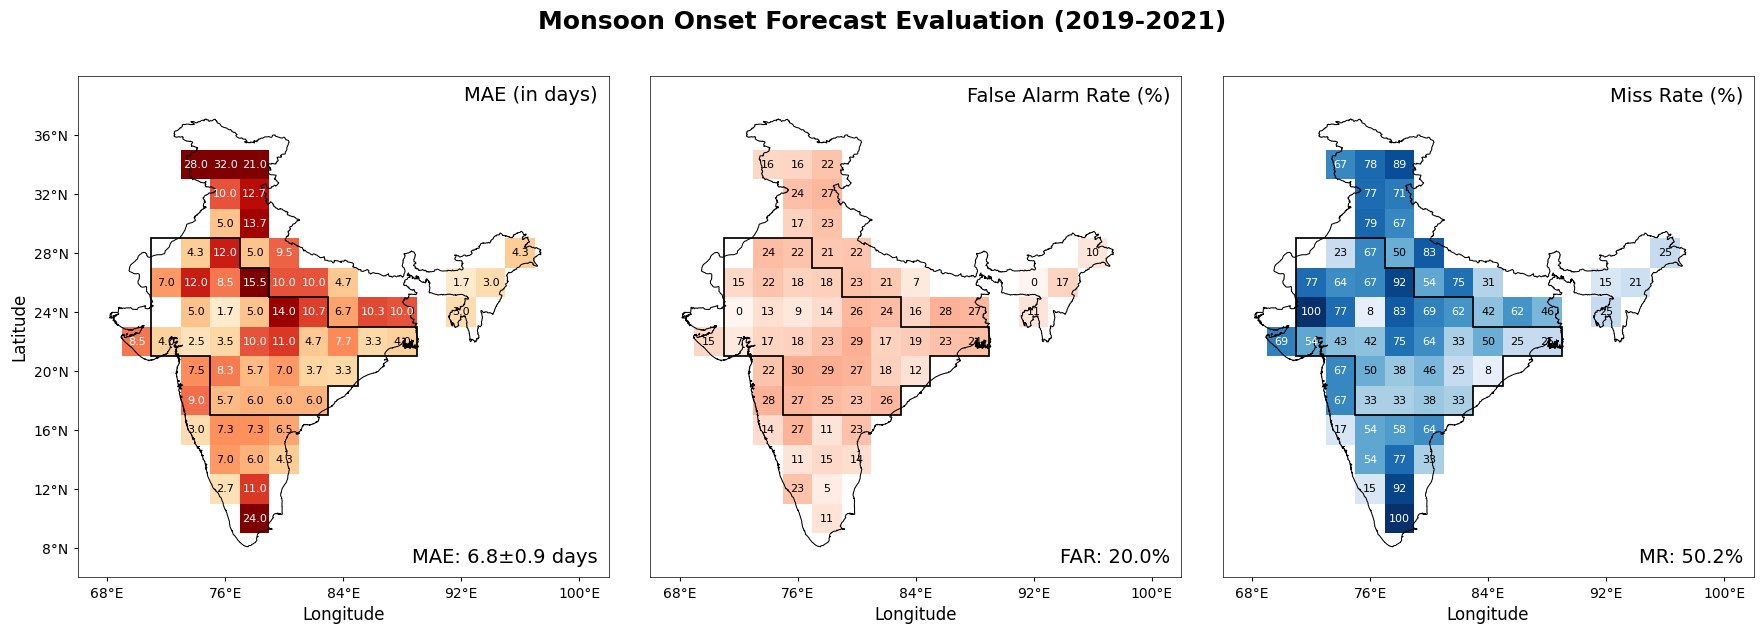

In [7]:
# Visualize results
fig, axes = plot_spatial_metrics(
    plot_climatology_metrics,
    config["shpfile_path"],
    figsize=(18, 6),
    save_path="outputs/climatology_monsoon_onset_metrics.png",
)

fig.suptitle(
    "Monsoon Onset Forecast Evaluation (2019-2021)",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)
plt.tight_layout()
plt.show()

## Deterministic Metrics

In [8]:
config["model_forecast_dir"] = "../../../data/model_forecast_data/aifs/daily_0z/tp_2p0_lsm/" # Deterministic Model Forecast
metrics = DeterministicOnsetMetrics()

In [9]:
# Compute metrics
deterministic_df, onset_da_dict = metrics.compute_metrics_multiple_years(
    years=config["years"],
    imd_folder=config["imd_folder"],
    thres_file=config["thres_file"],
    model_forecast_dir=config["model_forecast_dir"],
    tolerance_days=3,
    verification_window=1,
    forecast_days=15,
    max_forecast_day=15,
    mok=True,
    onset_window=5,
    mok_month=6,
    mok_day=2,
)


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_2019.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 16 lats x 17 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 7072
Skipped (no observed onset): 5460
Skipped (initialized after observed onset): 688
Valid initializations processed: 924
Onsets found: 307
Onset rate: 0.332
Computing onset metrics with tolerance = 3 days
Verification window starts 1 days after initialization
Forecast window length: 15 days
Processing 62 u

In [10]:
plot_deterministic_metrics = metrics.create_spatial_far_mr_mae(deterministic_df, onset_da_dict)

Creating spatial FAR, Miss Rate, yearly MAE, and mean MAE maps...
Grid dimensions: 16 lats x 17 lons
Years: [2019, 2020, 2021]


## Example using data downloader to download metrics data from deterministic metrics

In [ ]:
downloaded_paths = download_spatial_metrics_data(
    plot_deterministic_metrics,
    output_dir="outputs",
    filename="deterministic_spatial_metrics",
    formats=("netcdf", "csv"),
    metadata={"notebook_section": "climatology"},
)
downloaded_paths


In [10]:
import pandas as pd

pd.read_csv("outputs/deterministic_spatial_metrics.csv")

,lat,lon,false_alarm_rate,miss_rate,mean_mae,mae_2019,mae_2020,mae_2021
0,10,78,0.513514,0.000000,15.722222,45.166667,2.000000,0.000000
1,12,76,0.285714,0.000000,2.753968,2.333333,1.500000,4.428571
2,12,78,0.238095,0.076923,2.607143,0.250000,7.571429,0.000000
3,14,76,0.347826,0.076923,2.793651,3.666667,4.714286,0.000000
4,14,78,0.058824,0.230769,1.222222,0.666667,3.000000,0.000000
...,...,...,...,...,...,...,...,...
57,32,76,0.105263,0.461538,5.638889,3.250000,8.666667,5.000000
58,32,78,0.183673,0.571429,10.977778,8.666667,9.666667,14.600000
59,34,74,0.280000,0.333333,19.055556,7.166667,41.000000,9.000000
60,34,76,0.000000,1.000000,NaN,NaN,NaN,NaN


Detected resolution: 2.0 degrees
Using 2.0-degree CMZ polygon coordinates
Figure saved to: outputs/deterministic_monsoon_onset_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 5.00 ± 0.57 days
CMZ False Alarm Rate: 22.7 %
CMZ Miss Rate: 22.2 %


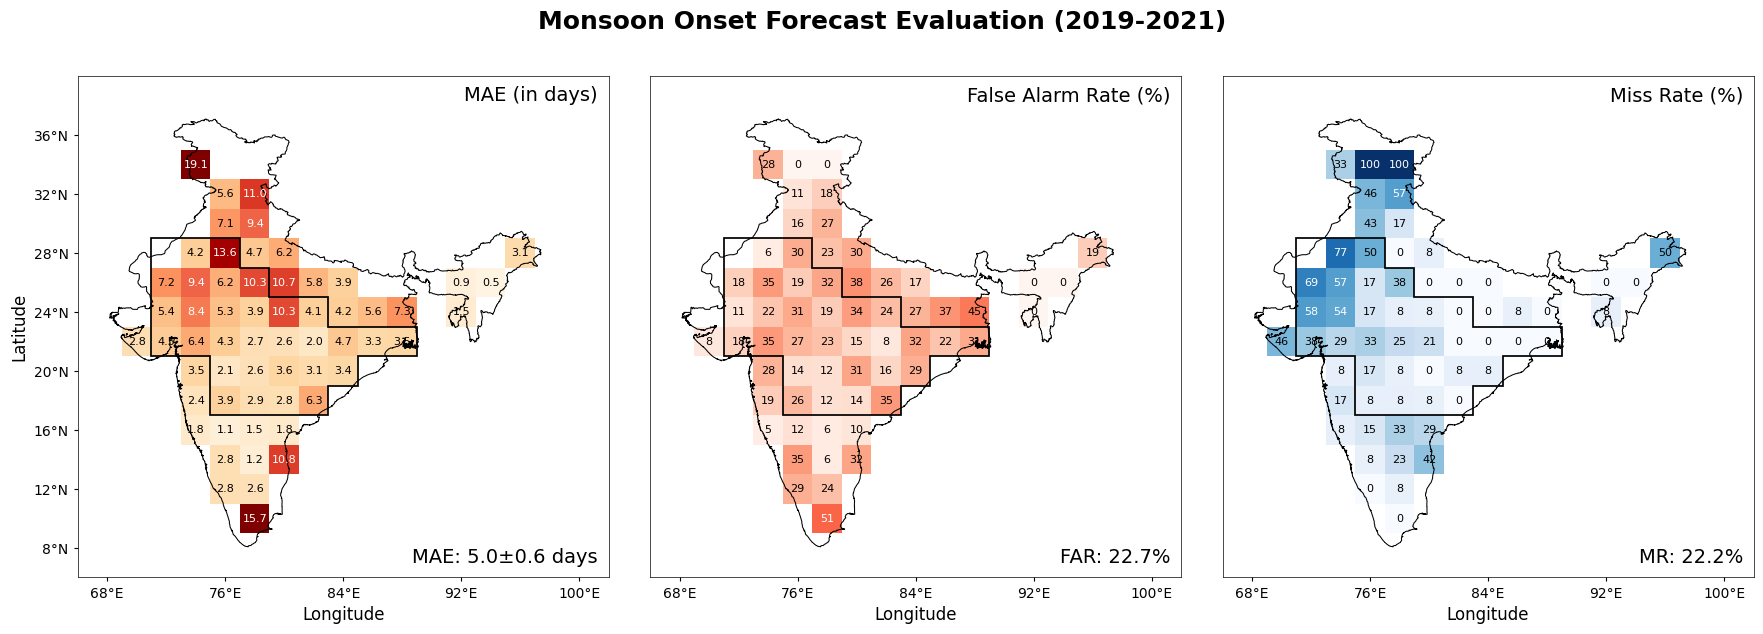

In [9]:
# Visualize results
fig, axes = plot_spatial_metrics(
    plot_deterministic_metrics,
    config["shpfile_path"],
    figsize=(18, 6),
    save_path="outputs/deterministic_monsoon_onset_metrics.png",
)

fig.suptitle(
    "Monsoon Onset Forecast Evaluation (2019-2021)",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)
plt.tight_layout()
plt.show()

## Probabilistic Metrics

In [10]:
config["model_forecast_dir"] = "../../../data/model_forecast_data/IFS-S2S/tp_2p0" # Probabilistic Model Forecast
metrics = ProbabilisticOnsetMetrics()

In [11]:
# Compute metrics
probabilistic_df, onset_da_dict = metrics.compute_metrics_multiple_years(
    years=config["years"],
    imd_folder=config["imd_folder"],
    thres_file=config["thres_file"],
    model_forecast_dir=config["model_forecast_dir"],
    tolerance_days=3,
    verification_window=1,
    forecast_days=15,
    max_forecast_day=15,
    mok=True,
    onset_window=5,
    mok_month=6,
    mok_day=2,
)


Processing year 2019
Loading IMD rainfall from: ../../../data/imd_rainfall_data/2p0/data_2019.nc
Renamed dimensions: {'latitude': 'lat', 'longitude': 'lon', 'TIME': 'time'}
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Processing 26 init times x 16 lats x 17 lons...
Using MOK (6/2 filter) for onset detection
Only processing forecasts initialized before observed onset dates
Requiring ≥50% of 11 members to have onset for ensemble onset
Processing init time 1/26: 2019-05-02
Processing init time 6/26: 2019-05-20
Processing init time 11/26: 2019-06-06
Processing init time 16/26: 2019-06-24
Processing init time 21/26: 2019-07-11
Processing init time 26/26: 2019-07-29

Processing Summary:
Total potential initializations: 7072
Skipped (no observed onset): 5460
Skipped (initialized after observed onset): 688
Valid initializations processed: 924
Ensemble onsets found (≥50% members): 273
Ensemble onset rate: 0.295
Note: Only onsets on or after 6/2 were counted due to M

In [12]:
plot_probabilistic_metrics= metrics.create_spatial_far_mr_mae(probabilistic_df, onset_da_dict)

Creating spatial FAR, Miss Rate, yearly MAE, and mean MAE maps...
Grid dimensions: 16 lats x 17 lons
Years: [2019, 2020, 2021]


Detected resolution: 2.0 degrees
Using 2.0-degree CMZ polygon coordinates
Figure saved to: outputs/probabilistic_monsoon_onset_metrics.png

=== CORE MONSOON ZONE (CMZ) AVERAGES ===
CMZ Mean MAE (avg across years): 4.47 ± 0.15 days
CMZ False Alarm Rate: 17.7 %
CMZ Miss Rate: 24.2 %


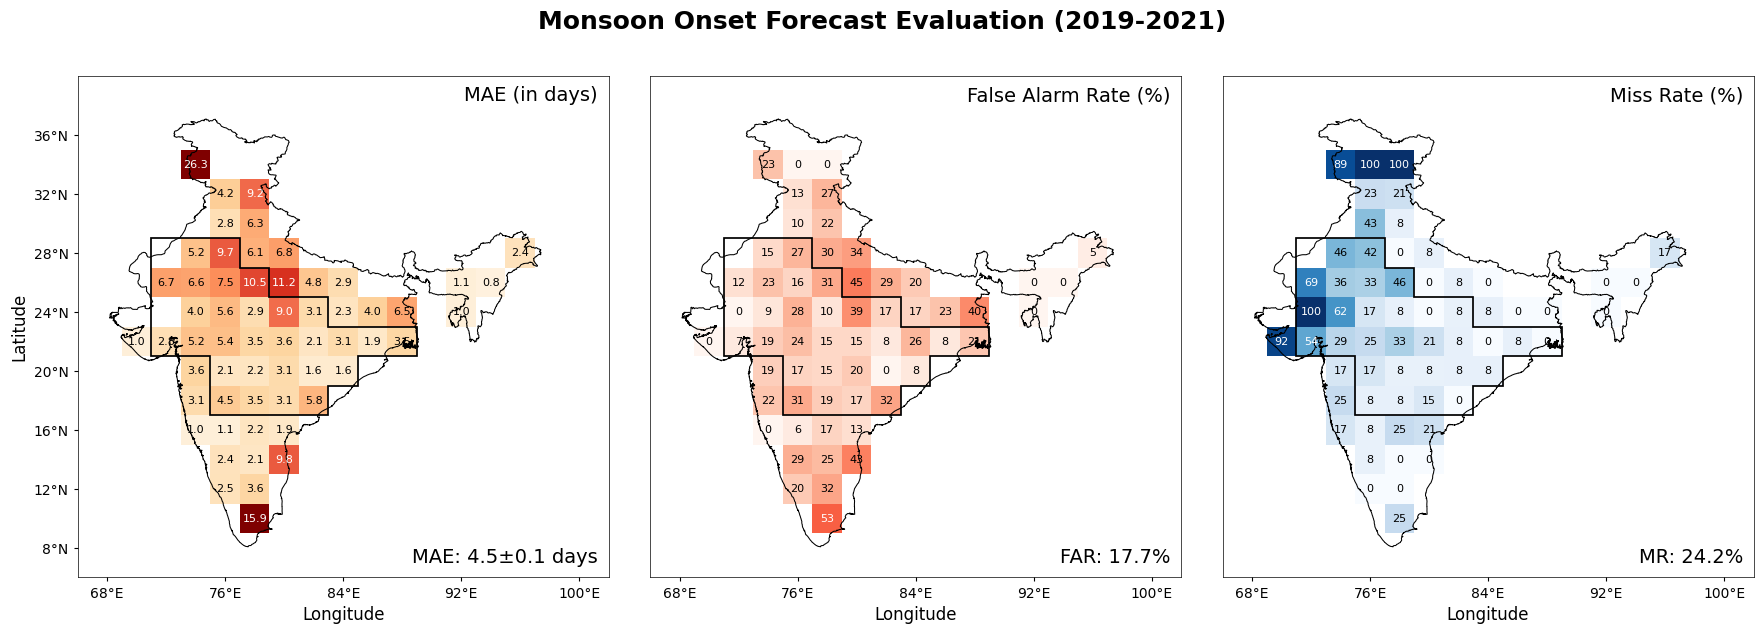

In [13]:
# Visualize results
fig, axes = plot_spatial_metrics(
    plot_probabilistic_metrics,
    config["shpfile_path"],
    figsize=(18, 6),
    save_path="outputs/probabilistic_monsoon_onset_metrics.png",
)

fig.suptitle(
    "Monsoon Onset Forecast Evaluation (2019-2021)",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)
plt.tight_layout()
plt.show()

## Compare!

In [14]:
import geopandas as gpd
import numpy as np

fig = plt.figure(figsize=(22, 18))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

models = ["Climatology", "Deterministic (AIFS)", "Probabilistic(IFS-S2S)"]
metrics_data = [plot_climatology_metrics, plot_deterministic_metrics, plot_probabilistic_metrics]
metric_names = ["FAR", "Miss Rate", "Mean MAE"]
metric_keys = ["false_alarm_rate", "miss_rate", "mean_mae"]

india_shp = gpd.read_file(config["shpfile_path"])

shared_ranges = {}
for metric_key in metric_keys:
  all_values = []
  for data in metrics_data:
      values = data[metric_key].values
      all_values.append(values[~np.isnan(values)])
  all_values = np.concatenate(all_values)
  shared_ranges[metric_key] = (np.nanmin(all_values),
np.nanmax(all_values))


# Plot each metric for all three models
for j, (metric_name, metric_key) in enumerate(zip(metric_names, metric_keys)):
  vmin, vmax = shared_ranges[metric_key]

  for i, (model_name, data) in enumerate(zip(models, metrics_data)):
      ax = fig.add_subplot(gs[j, i])

      metric_data = data[metric_key]

      im = ax.pcolormesh(
          metric_data.lon,
          metric_data.lat,
          metric_data.values,
          cmap="RdYlGn_r" if metric_key in ["far", "miss_rate"] else "viridis",
          vmin=vmin,
          vmax=vmax,
          shading="auto"
      )

      india_shp.boundary.plot(ax=ax, linewidth=1.5, edgecolor="black")

      ax.set_xlabel("Longitude", fontsize=10)
      ax.set_ylabel("Latitude", fontsize=10)
      ax.set_title(f"{model_name}\n{metric_name}", fontsize=12, fontweight="bold")

      cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
      cbar.set_label(metric_name, rotation=270, labelpad=15, fontsize=9)

fig.suptitle(
  "Comprehensive Model Comparison: Monsoon Onset Metrics (2019-2021)\n(Shared scales for each metric)",
  fontsize=20,
  fontweight="bold",
  y=0.998
)
plt.savefig("outputs/comprehensive_model_comparison.png", dpi=300,
bbox_inches="tight")
plt.show()

print("\n" + "="*80)
print("SUMMARY STATISTICS COMPARISON")
print("="*80)

for model_name, data in zip(models, metrics_data):
  print(f"\n{model_name}:")
  print(f"  FAR:        {float(data['false_alarm_rate'].mean()):.3f} (mean), {float(data['false_alarm_rate'].std()):.3f} (std)")
  print(f"  Miss Rate:  {float(data['miss_rate'].mean()):.3f} (mean), {float(data['miss_rate'].std()):.3f} (std)")
  print(f"  Mean MAE:   {float(data['mean_mae'].mean()):.3f} days (mean), {float(data['mean_mae'].std()):.3f} (std)")

NameError: name 'plot_climatology_metrics' is not defined

<Figure size 2200x1800 with 0 Axes>